In [1]:
import torch
from Nets import Net, NetNoise
from functions import train, test
from dataloaders import MNIST, MNIST_train_random_lebels, dead_leaves_squares_pretraining, ImageNetKaggle
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

torch.cuda.is_available()

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


True

-------------------------------------------------- pretraining --------------------------------------------------
Epoch 1 [0 / 60000]       loss: 2.307539463043213
Epoch 1 [6400 / 60000]       loss: 1.0011746883392334
Epoch 1 [12800 / 60000]       loss: 0.5906047821044922
Epoch 1 [19200 / 60000]       loss: 0.31852397322654724
Epoch 1 [25600 / 60000]       loss: 0.27822962403297424
Epoch 1 [32000 / 60000]       loss: 0.45530369877815247
Epoch 1 [38400 / 60000]       loss: 0.36645498871803284
Epoch 1 [44800 / 60000]       loss: 0.2383306473493576
Epoch 1 [51200 / 60000]       loss: 0.3692533075809479
Epoch 1 [57600 / 60000]       loss: 0.1583719104528427


c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 11.8451, Accuracy: 945/10000 (9%)

-------------------------------------------------- training only last layer --------------------------------------------------
Epoch 1 [0 / 60000]       loss: 12.262153625488281
Epoch 1 [6400 / 60000]       loss: 0.3598383069038391
Epoch 1 [12800 / 60000]       loss: 0.5985853672027588
Epoch 1 [19200 / 60000]       loss: 0.29520383477211
Epoch 1 [25600 / 60000]       loss: 0.21222689747810364
Epoch 1 [32000 / 60000]       loss: 0.22639170289039612
Epoch 1 [38400 / 60000]       loss: 0.2977801561355591
Epoch 1 [44800 / 60000]       loss: 0.4869020879268646
Epoch 1 [51200 / 60000]       loss: 0.30775582790374756
Epoch 1 [57600 / 60000]       loss: 0.23543207347393036

Test set: Avg. loss: 0.1398, Accuracy: 9532/10000 (95%)



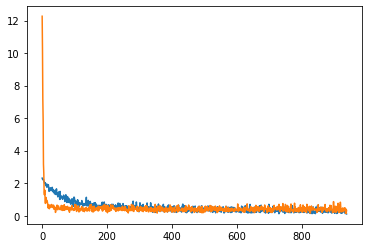

In [2]:
print('-'*50, 'pretraining', '-'*50)
train_loader_random_lebels = MNIST_train_random_lebels()
train_loader, test_loader = MNIST()

model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_losses = train(model, optimizer, train_loader_random_lebels)
plt.plot(train_losses)
test(model, test_loader)

print('-'*50, 'training only last layer', '-'*50)
model.conv1.requires_grad_(False)
model.conv2.requires_grad_(False)
model.conv2_drop.requires_grad_(False)
model.fc1.requires_grad_(False)

train_losses = train(model, optimizer, train_loader)
plt.plot(train_losses)
test(model, test_loader)

In [2]:
print('-'*50, 'pretraining', '-'*50)
train_loader_random_lebels = dead_leaves_squares_pretraining()
# train_loader, test_loader = MNIST() Imagnet100

model = NetNoise()
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_losses = train(model, optimizer, train_loader_random_lebels)
plt.plot(train_losses)
test(model, test_loader)

print('-'*50, 'training only last layer', '-'*50)


train_losses = train(model, optimizer, train_loader)
plt.plot(train_losses)
test(model, test_loader)

-------------------------------------------------- pretraining --------------------------------------------------
Loading data from data/dead_leaves-squares/ as imagefolder
Epoch 1 [0 / 105000]       loss: 4.659185886383057
Epoch 1 [12800 / 105000]       loss: 4.651777744293213


KeyboardInterrupt: 